In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [28]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, completeness_score

In [30]:
import warnings
warnings.filterwarnings('ignore')

# Question1 

## K Mean

In [13]:
q1=pd.read_csv('crime_data.csv')

In [14]:
q1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [15]:
q1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [16]:
q1.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [18]:
q1.drop(['Unnamed: 0'],axis=1,inplace=True)
q1

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


### Scale the data by standardizing it

In [22]:
scaler=StandardScaler()
scaled_q1=scaler.fit_transform(q1)
scaled_q1

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

## Build a rough model by taking any k-value

In [23]:
model = KMeans(n_clusters=2, random_state=42)
model.fit(scaled_q1)

KMeans(n_clusters=2, random_state=42)

In [24]:
model.labels_

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

In [25]:
model.inertia_

104.96163315756871

In [31]:
wcss = []
for i in range(1,11):
    model = KMeans(n_clusters=i, random_state=42)
    model.fit(scaled_q1)
    wcss.append(model.inertia_)

In [32]:
wcss

[200.0,
 104.96163315756871,
 80.08569526137276,
 57.55425863091104,
 50.33327385184907,
 44.259807638112314,
 40.91266722247345,
 35.695877063333725,
 32.57509993011513,
 29.253498916734607]

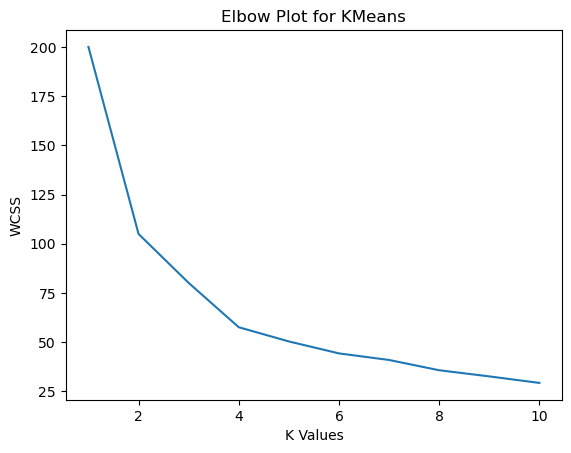

In [33]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Plot for KMeans')
plt.xlabel('K Values')
plt.ylabel('WCSS')
plt.show()

## Build the final model

In [56]:
final_model = KMeans(n_clusters=5, random_state=42)
final_model.fit(scaled_q1)
labels = final_model.labels_

In [57]:
labels

array([3, 1, 1, 2, 1, 1, 0, 0, 1, 3, 0, 4, 1, 2, 4, 2, 2, 3, 4, 1, 0, 1,
       4, 3, 1, 2, 2, 1, 4, 0, 1, 1, 3, 4, 0, 2, 0, 0, 0, 3, 4, 3, 1, 0,
       4, 2, 0, 4, 4, 2])

In [58]:
q1['Labels'] = labels
q1

,Murder,Assault,UrbanPop,Rape,Labels
0,13.2,236,58,21.2,3
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,2
4,9.0,276,91,40.6,1
5,7.9,204,78,38.7,1
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,1
9,17.4,211,60,25.8,3


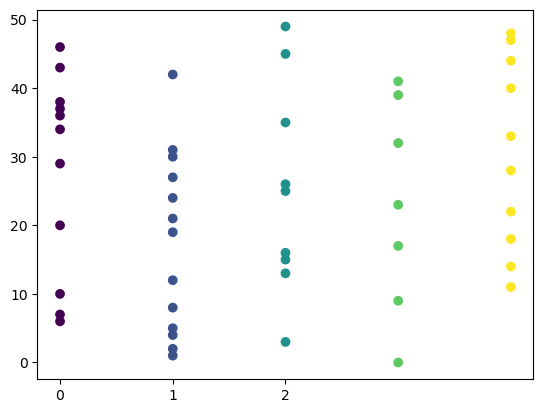

In [59]:
plt.scatter(q1['Labels'], q1.index, c=labels, cmap='viridis')
plt.xticks([0,1,2])
plt.show()

In [60]:
grp = q1.groupby(['Labels'])
grp

In [61]:
for x,y in grp:
    print(y)
    print('_________________________________________________________________________')

    Murder  Assault  UrbanPop  Rape  Labels
6      3.3      110        77  11.1       0
7      5.9      238        72  15.8       0
10     5.3       46        83  20.2       0
20     4.4      149        85  16.3       0
29     7.4      159        89  18.8       0
34     7.3      120        75  21.4       0
36     4.9      159        67  29.3       0
37     6.3      106        72  14.9       0
38     3.4      174        87   8.3       0
43     3.2      120        80  22.9       0
46     4.0      145        73  26.2       0
_________________________________________________________________________
    Murder  Assault  UrbanPop  Rape  Labels
1     10.0      263        48  44.5       1
2      8.1      294        80  31.0       1
4      9.0      276        91  40.6       1
5      7.9      204        78  38.7       1
8     15.4      335        80  31.9       1
12    10.4      249        83  24.0       1
19    11.3      300        67  27.8       1
21    12.1      255        74  35.1       1
24

In [62]:
grp.agg(['mean','min','max'])

Murder                 Assault             UrbanPop          \
             mean   min   max        mean  min  max       mean min max   
Labels                                                                   
0        5.036364   3.2   7.4  138.727273   46  238  78.181818  67  89   
1       10.815385   7.9  15.4  257.384615  178  335  76.000000  48  91   
2        7.100000   4.3   9.7  134.000000  102  190  59.888889  50  68   
3       14.671429  13.0  17.4  251.285714  188  337  54.285714  44  66   
4        2.680000   0.8   5.7   70.100000   45  120  51.000000  32  66   

             Rape              
             mean   min   max  
Labels                         
0       18.654545   8.3  29.3  
1       33.192308  24.0  46.0  
2       18.222222  15.6  21.0  
3       21.685714  16.1  26.9  
4       10.910000   7.3  14.9

In [63]:
silhouette_score(q1.iloc[:,0:6], labels)

0.089229866528102

## Hierarchical

In [64]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

In [66]:
scaler = MinMaxScaler()
scaled_q1 = scaler.fit_transform(q1)
scaled_q1[0:5,:]

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313, 0.75      ],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031, 0.25      ],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 , 0.25      ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548, 0.5       ],
       [0.4939759 , 0.79109589, 1.        , 0.86046512, 0.25      ]])

In [67]:
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
model.fit(scaled_q1)

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [68]:
labels = model.labels_
labels

array([1, 0, 0, 4, 0, 0, 2, 2, 0, 1, 2, 3, 0, 4, 3, 4, 4, 1, 3, 0, 2, 0,
       3, 1, 0, 4, 4, 0, 3, 2, 0, 0, 1, 3, 2, 4, 2, 2, 2, 1, 3, 1, 0, 2,
       3, 4, 2, 3, 3, 4], dtype=int64)

In [69]:
q1['Labels'] = labels
q1.head()

,Murder,Assault,UrbanPop,Rape,Labels
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,4
4,9.0,276,91,40.6,0


In [71]:
grp = q1.groupby(q1['Labels'])
grp

In [72]:
for x,y in grp:
    print(y)
    print("_____________________________________________________________________")

    Murder  Assault  UrbanPop  Rape  Labels
1     10.0      263        48  44.5       0
2      8.1      294        80  31.0       0
4      9.0      276        91  40.6       0
5      7.9      204        78  38.7       0
8     15.4      335        80  31.9       0
12    10.4      249        83  24.0       0
19    11.3      300        67  27.8       0
21    12.1      255        74  35.1       0
24     9.0      178        70  28.2       0
27    12.2      252        81  46.0       0
30    11.4      285        70  32.1       0
31    11.1      254        86  26.1       0
42    12.7      201        80  25.5       0
_____________________________________________________________________
    Murder  Assault  UrbanPop  Rape  Labels
0     13.2      236        58  21.2       1
9     17.4      211        60  25.8       1
17    15.4      249        66  22.2       1
23    16.1      259        44  17.1       1
32    13.0      337        45  16.1       1
39    14.4      279        48  22.5       1
41    

In [73]:
grp.agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
Labels,,,,
0,10.815385,257.384615,76.000000,33.192308
1,14.671429,251.285714,54.285714,21.685714
2,5.036364,138.727273,78.181818,18.654545
3,2.680000,70.100000,51.000000,10.910000
4,7.100000,134.000000,59.888889,18.222222


In [74]:
from scipy.cluster import hierarchy

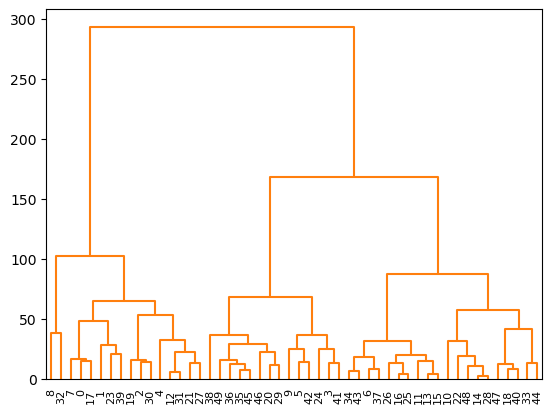

In [76]:
hr = hierarchy.linkage(q1.iloc[:,0:6], method='complete')
dn = hierarchy.dendrogram(hr, color_threshold=50000)

## DBSCAN

In [77]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import scale

In [88]:
model = DBSCAN(eps=1, min_samples=4)
model.fit(q1)

DBSCAN(eps=1, min_samples=4)

In [89]:
labels = model.labels_
labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

In [90]:
q1['labels'] = labels
q1.head()

,Murder,Assault,UrbanPop,Rape,Labels,labels
0,13.2,236,58,21.2,1,-1
1,10.0,263,48,44.5,0,-1
2,8.1,294,80,31.0,0,-1
3,8.8,190,50,19.5,4,-1
4,9.0,276,91,40.6,0,-1


In [91]:
grp = q1.groupby('labels')
grp

In [92]:
for x,y in grp:
    print(y)
    print("     __________________________________________________________________________________")

    Murder  Assault  UrbanPop  Rape  Labels  labels
0     13.2      236        58  21.2       1      -1
1     10.0      263        48  44.5       0      -1
2      8.1      294        80  31.0       0      -1
3      8.8      190        50  19.5       4      -1
4      9.0      276        91  40.6       0      -1
5      7.9      204        78  38.7       0      -1
6      3.3      110        77  11.1       2      -1
7      5.9      238        72  15.8       2      -1
8     15.4      335        80  31.9       0      -1
9     17.4      211        60  25.8       1      -1
10     5.3       46        83  20.2       2      -1
11     2.6      120        54  14.2       3      -1
12    10.4      249        83  24.0       0      -1
13     7.2      113        65  21.0       4      -1
14     2.2       56        57  11.3       3      -1
15     6.0      115        66  18.0       4      -1
16     9.7      109        52  16.3       4      -1
17    15.4      249        66  22.2       1      -1
18     2.1  

In [93]:
grp.agg(['mean'])

,Murder,Assault,UrbanPop,Rape,Labels
,mean,mean,mean,mean,mean
labels,,,,,
-1,7.788,170.76,65.54,21.232,1.9


# Question 2

In [166]:
q2=pd.read_csv('EastWestAirlines.csv',index_col=['ID#'])

In [167]:
q2.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [168]:
q2.tail()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1
4020,54899,0,1,1,1,500,1,500,1,1401,0
4021,3016,0,1,1,1,0,0,0,0,1398,0


# K Mean

In [169]:
q2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [170]:
q2.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [171]:
q2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


## Scale the data by standardizing it

In [172]:
scaler = StandardScaler()
scaled_q2 = scaler.fit_transform(q2)
scaled_q2

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

## Build a rough model by taking any k-value

In [173]:
model=KMeans(n_clusters=3,random_state=42)
model.fit(q2)

KMeans(n_clusters=3, random_state=42)

In [174]:
model.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [175]:
model.inertia_

11822347583075.145

In [176]:
wcss = []
for i in range(1,26):
    model = KMeans(n_clusters=i, random_state=42)
    model.fit(scaled_q2)
    wcss.append(model.inertia_)

In [177]:
wcss

[43988.99999999999,
 35409.5166298613,
 30899.21640879058,
 27162.166106124132,
 23707.163884815593,
 21089.75687002387,
 19166.38904378935,
 17316.725861419516,
 15960.406001471118,
 14732.22988234744,
 13706.437043029622,
 12947.112221214666,
 12431.282300776244,
 11978.09416019512,
 11457.861622629429,
 11123.795503875028,
 10756.73396714099,
 10405.666259725165,
 10134.218972001308,
 9752.213436176704,
 9510.11054039945,
 9269.905083994538,
 8988.328542072944,
 8816.698125080404,
 8522.091824164212]

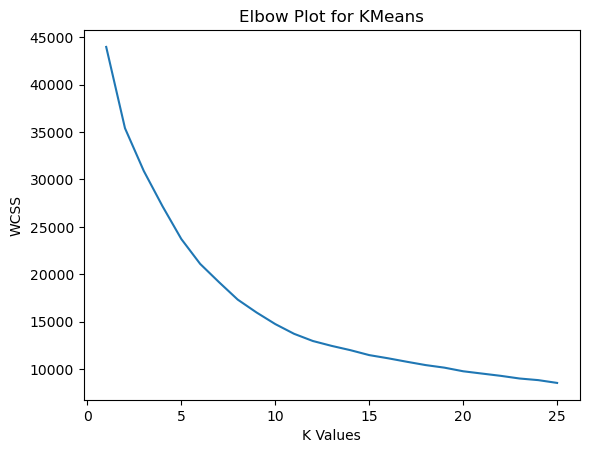

In [178]:
plt.plot(range(1,26),wcss)
plt.title('Elbow Plot for KMeans')
plt.xlabel('K Values')
plt.ylabel('WCSS')
plt.show()

## Build the final model

In [198]:
final_model = KMeans(n_clusters=8, random_state=42)
final_model.fit(scaled_q2)
labels = final_model.labels_

In [199]:
labels

array([0, 0, 0, ..., 7, 6, 6])

In [200]:
q2['Labels']=labels

In [201]:
q2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Labels
ID#,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0
2,19244,0,1,1,1,215,2,0,0,6968,0,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,0
4,14776,0,1,1,1,500,1,0,0,6952,0,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,7
4018,64385,0,1,1,1,981,5,0,0,1395,1,7
4019,73597,0,3,1,1,25447,8,0,0,1402,1,7


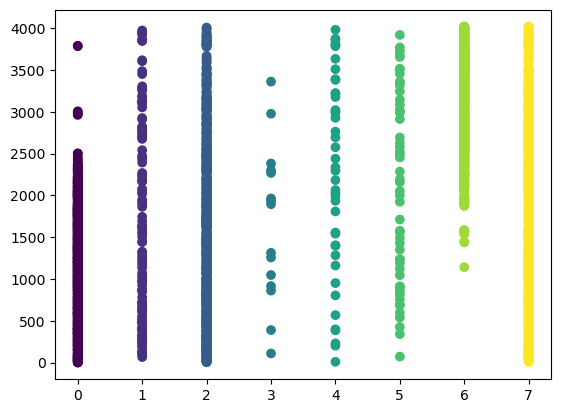

In [202]:
plt.scatter(q2['Labels'], q2.index, c=labels, cmap='viridis')
plt.show()

In [203]:
grp = q2.groupby(['Labels'])
grp

In [204]:
for x,y in grp:
    print(y)
    print('_____________________________________________________________________')


      Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                       
1       28143           0          1          1          1          174   
2       19244           0          1          1          1          215   
3       41354           0          1          1          1         4123   
4       14776           0          1          1          1          500   
6       16420           0          1          1          1            0   
...       ...         ...        ...        ...        ...          ...   
2981    65926           0          3          1          1        11639   
2997    87507           0          3          1          1        17714   
3006   326201           0          1          1          1        19350   
3786    83276           0          3          1          1        22539   
3790    74651           0          2          1          1        10893   

      Bonus_trans  Fligh

In [205]:
grp.agg(['mean','min','max'])

Balance                   Qual_miles              cc1_miles      \
                 mean    min      max         mean   min    max      mean min   
Labels                                                                          
0        59285.212462     50   456509    32.602656     0   2704  1.495403   1   
1       198946.650407    231  1704838   554.235772     0   4704  2.406504   1   
2       138370.597561   3268  1125076    61.925610     0   2880  4.201220   1   
3       138061.400000  15835   737514    78.800000     0   1182  3.466667   1   
4        68876.581395   4148   443003    23.255814     0   1000  1.139535   1   
5       115098.296296   6015   529886  5653.611111  2947  11148  2.018519   1   
6        34625.162771     68   278258    32.734199     0   3071  1.253680   1   
7        58169.349383      0   518960    98.964198     0   2900  1.695062   1   

           cc2_miles  ... Flight_miles_12mo Flight_trans_12          \
       max      mean  ...               max            mean min max   
Labels                ...                                             
0        4  1.000000  ...              6368        0.530133   0  16   
1        5  1.000000  ...             30817       17.674797   1  53   
2        5  1.000000  ...              4130        1.180488   0  12   
3        5  1.000000  ...              2300        1.600000   0   9   
4        4  2.348837  ...              5000        2.209302   0  24   
5        5  1.000000  ...              7741        2.666667   0  15   
6        4  1.000000  ...              5446        0.450216   0  12   
7        4  1.000000  ...              6251        1.295062   0  16   

       Days_since_enroll                Award?          
                    mean   min   max      mean min max  
Labels                                                  
0            5629.152196  3119  8296  0.000000   0   0  
1            4751.528455  1041  8296  0.821138   0   1  
2            4957.047561   669  8296  0.630488   0   1  
3            4613.866667  1054  6980  0.533333   0   1  
4            3968.930233   531  8296  0.395349   0   1  
5            3960.907407    30  8296  0.518519   0   1  
6            2086.555844     2  4170  0.000000   0   0  
7            4254.603704   301  8296  1.000000   1   1  

[8 rows x 33 columns]

In [206]:
silhouette_score(q2.iloc[:,0:33], labels)

-0.0885323662899017

# Hierarchical

In [207]:
q2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
 11  Labels             3999 non-null   int32
dtypes: int32(1), int64(11)
memory usage: 390.5 KB


In [209]:
scaler = MinMaxScaler()
scaled_q2 = scaler.fit_transform(q2)
scaled_q2[0:5,:]

array([[1.65077268e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 6.59878264e-04, 1.16279070e-02, 0.00000000e+00,
        0.00000000e+00, 8.43742464e-01, 0.00000000e+00, 0.00000000e+00],
       [1.12878760e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 8.15366820e-04, 2.32558140e-02, 0.00000000e+00,
        0.00000000e+00, 8.39884254e-01, 0.00000000e+00, 0.00000000e+00],
       [2.42568502e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.56360809e-02, 4.65116279e-02, 0.00000000e+00,
        0.00000000e+00, 8.47841813e-01, 0.00000000e+00, 0.00000000e+00],
       [8.66709916e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.89620191e-03, 1.16279070e-02, 0.00000000e+00,
        0.00000000e+00, 8.37955148e-01, 0.00000000e+00, 0.00000000e+00],
       [5.73379993e-02, 0.00000000e+00, 7.50000000e-01, 0.00000000e+00,
        0.00000000e+00, 1.64211085e-01, 3.02325581e-01, 6.73

## Build the Model

In [212]:
model = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='complete')
model.fit(scaled_q2)

AgglomerativeClustering(linkage='complete', n_clusters=8)

In [213]:
labels = model.labels_
labels

array([4, 4, 4, ..., 1, 4, 4], dtype=int64)

In [214]:
q2['Labels'] = labels
q2.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Labels
ID#,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,4
2,19244,0,1,1,1,215,2,0,0,6968,0,4
3,41354,0,1,1,1,4123,4,0,0,7034,0,4
4,14776,0,1,1,1,500,1,0,0,6952,0,4
5,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [216]:
grp = q2.groupby(q2['Labels'])
grp

In [217]:
for x,y in grp:
    print(y)
    print("_____________________________________________________________________")

      Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                       
5       97752           0          4          1          1        43300   
10     104860           0          3          1          1        28426   
12      96522           0          5          1          1        61105   
16      28495           0          4          1          1        49442   
17      51890           0          4          1          1        48963   
...       ...         ...        ...        ...        ...          ...   
3878   190730           0          5          1          1        78916   
3904    32424           0          4          1          1        39635   
3906   126167           0          5          1          1       190160   
3931    57642           0          4          1          1        52176   
3953    40424           0          4          1          1        44110   

      Bonus_trans  Fligh

In [218]:
grp.agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Labels,,,,,,,,,,,
0,132085.626335,151.357651,4.298932,1.000000,1.037367,56704.510676,21.861210,824.911032,2.548043,5155.549822,1.0
1,66418.494961,192.581187,1.658455,1.025756,1.000000,11415.954087,11.699888,769.192609,2.306831,4255.510638,1.0
2,64521.000000,295.500000,1.250000,1.000000,4.250000,73273.750000,15.750000,575.000000,2.250000,4242.750000,0.5
3,183917.083333,7345.000000,2.000000,1.000000,1.000000,19439.666667,16.333333,1692.583333,5.833333,6164.333333,1.0
4,43359.827844,86.695110,1.195609,1.016966,1.000499,4066.071357,6.969062,220.850798,0.645210,3677.329341,0.0
5,918033.250000,997.875000,1.000000,1.000000,1.000000,11186.750000,15.625000,2127.375000,10.250000,7098.875000,1.0
6,124135.591797,91.496094,3.703125,1.001953,1.027344,34127.048828,17.646484,248.474609,0.683594,4387.941406,0.0
7,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.0


In [224]:
q2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Labels
ID#,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,4
2,19244,0,1,1,1,215,2,0,0,6968,0,4
3,41354,0,1,1,1,4123,4,0,0,7034,0,4
4,14776,0,1,1,1,500,1,0,0,6952,0,4
5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
4018,64385,0,1,1,1,981,5,0,0,1395,1,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1,1


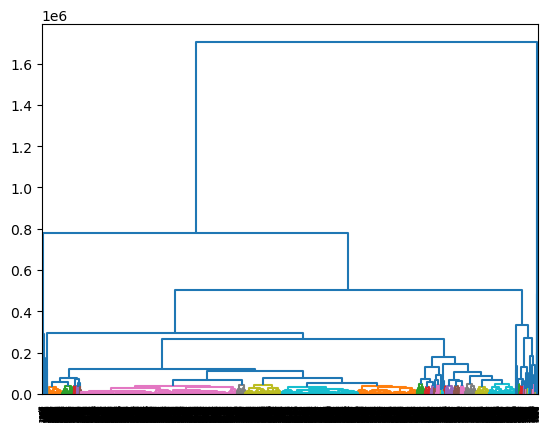

In [225]:
hr = hierarchy.linkage(q2.iloc[:,0:6], method='complete')
dn = hierarchy.dendrogram(hr, color_threshold=50000)

# DBSCAN

In [226]:
model = DBSCAN(eps=0.5, min_samples=12)
model.fit(q2)

DBSCAN(min_samples=12)

In [227]:
labels = model.labels_
labels

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [228]:
q2['labels']=labels
q2.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Labels,labels
ID#,,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,4,-1
2,19244,0,1,1,1,215,2,0,0,6968,0,4,-1
3,41354,0,1,1,1,4123,4,0,0,7034,0,4,-1
4,14776,0,1,1,1,500,1,0,0,6952,0,4,-1
5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,-1


In [230]:
grp = q2.groupby('labels')
grp

In [231]:
for x,y in grp:
    print(y)
    print("     __________________________________________________________________________________")

      Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                       
1       28143           0          1          1          1          174   
2       19244           0          1          1          1          215   
3       41354           0          1          1          1         4123   
4       14776           0          1          1          1          500   
5       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
4017    18476           0          1          1          1         8525   
4018    64385           0          1          1          1          981   
4019    73597           0          3          1          1        25447   
4020    54899           0          1          1          1          500   
4021     3016           0          1          1          1            0   

      Bonus_trans  Fligh

In [233]:
grp.agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Labels
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
labels,,,,,,,,,,,,
-1,73601.327582,144.114529,2.059515,1.014504,1.012253,17144.846212,11.6019,460.055764,1.373593,4118.55939,0.370343,3.024006
